In [2]:
import warnings # Got an irritating warning
warnings.filterwarnings('ignore')
import pandas as pd
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt
import numpy as np

In [3]:
dataset = pd.read_csv("H:\Informasjonsvitenskap\Programming\Python\Info-284\Info284_Project\Exam Task\Dataset\elektronisk-rapportering-ers-2018-fangstmelding-dca-simple.csv", sep=";")

# Dataset where the species isn't the same as the main-species
bycatch = dataset[dataset['Art FAO'] != dataset['Hovedart FAO']]

<Axes: xlabel='Lengdegruppe'>

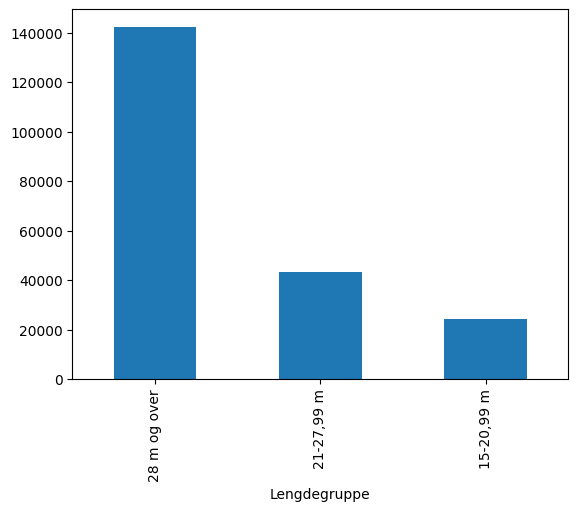

In [4]:
# A count of instances of equipment used for every Bycatch. 
count_of_equipment_used_for_only_Bycatch = bycatch.groupby(["Lengdegruppe"])["Lengdegruppe"].count()
count_of_equipment_used_for_only_Bycatch = count_of_equipment_used_for_only_Bycatch.sort_values(ascending=False)
count_of_equipment_used_for_only_Bycatch.plot(kind="bar")

<Axes: xlabel='Lengdegruppe'>

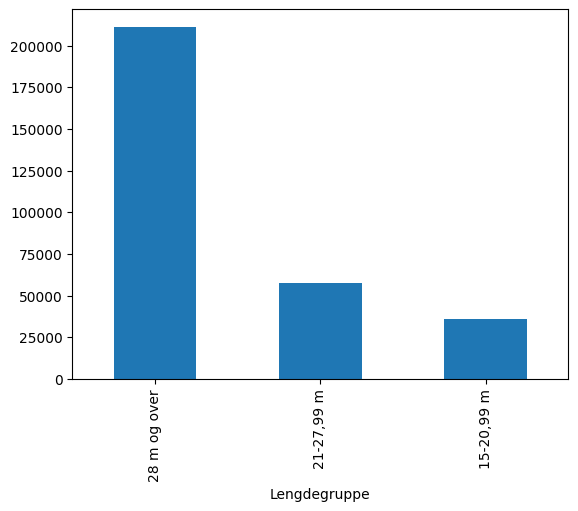

In [5]:
# A count of instances of equipment used for every species. 
count_of_equipment_used = dataset.groupby(["Lengdegruppe"])["Lengdegruppe"].count()
count_of_equipment_used = count_of_equipment_used.sort_values(ascending=False)
count_of_equipment_used.plot(kind="bar")

Same issue as equipment, i assume larger boats uses equipments that are more often used to catch bycatch like tråler and such. 
will look at the relation between equipments and ship size. 

In [19]:
every_lengthgroup = ["28 m og over", "21-27,99 m", "15-20,99 m"]

for length_group in every_lengthgroup:
        lengdegruppe_dataset = dataset[dataset["Lengdegruppe"] == length_group]
        lengdegruppe_equipmentcount = lengdegruppe_dataset.groupby([lengdegruppe_dataset["Redskap FAO"]])["Redskap FAO"].count()
        lengdegruppe_equipmentcount.sort_values(ascending=False, inplace=True)
        print(f"Top 3 common equipment for boats in category: {length_group}\n{lengdegruppe_equipmentcount.head(3)}\n")

Top 3 common equipment for boats in category: 28 m og over
Redskap FAO
Bunntrål, otter      102895
Andre liner           24054
Snurrevad, skotsk     17463
Name: Redskap FAO, dtype: int64

Top 3 common equipment for boats in category: 21-27,99 m
Redskap FAO
Bunntrål, otter      13202
Snurrevad, skotsk    11134
Bunntrål, reke       10051
Name: Redskap FAO, dtype: int64

Top 3 common equipment for boats in category: 15-20,99 m
Redskap FAO
Setteline            7639
Snurrevad, skotsk    6428
Bunntrål, reke       5689
Name: Redskap FAO, dtype: int64



In [20]:
for length_group in every_lengthgroup:
        lengdegruppe_dataset = bycatch[bycatch["Lengdegruppe"] == length_group]
        lengdegruppe_equipmentcount = lengdegruppe_dataset.groupby([lengdegruppe_dataset["Redskap FAO"]])["Redskap FAO"].count()
        lengdegruppe_equipmentcount.sort_values(ascending=False, inplace=True)
        print(f"Top 3 common equipment for boats in category: {length_group}\n{lengdegruppe_equipmentcount.head(3)}\n")

Top 3 common equipment for boats in category: 28 m og over
Redskap FAO
Bunntrål, otter      71419
Andre liner          19316
Snurrevad, skotsk    11030
Name: Redskap FAO, dtype: int64

Top 3 common equipment for boats in category: 21-27,99 m
Redskap FAO
Bunntrål, otter      10708
Bunntrål, reke        7925
Snurrevad, skotsk     7314
Name: Redskap FAO, dtype: int64

Top 3 common equipment for boats in category: 15-20,99 m
Redskap FAO
Setteline            6239
Bunntrål, reke       3875
Snurrevad, skotsk    3668
Name: Redskap FAO, dtype: int64



As we can see length group looks pretty promising as each lengthgroup category has a different ratio of equipments used. smaller boats do not use bunntrål as much as other lengthgroups. 